<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

---

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-data" data-toc-modified-id="Import-the-data-1">Import the data</a></span></li><li><span><a href="#Do-some-EDA-of-relationships-between-features" data-toc-modified-id="Do-some-EDA-of-relationships-between-features-2">Do some EDA of relationships between features</a></span></li><li><span><a href="#Prepare-the-data-for-clustering" data-toc-modified-id="Prepare-the-data-for-clustering-3">Prepare the data for clustering</a></span></li><li><span><a href="#Rescale-the-data-if-necessary" data-toc-modified-id="Rescale-the-data-if-necessary-4">Rescale the data if necessary</a></span></li><li><span><a href="#Clustering-with-K-Means" data-toc-modified-id="Clustering-with-K-Means-5">Clustering with K-Means</a></span></li><li><span><a href="#Get-the-labels-and-centroids-for-out-first-clustering-model" data-toc-modified-id="Get-the-labels-and-centroids-for-out-first-clustering-model-6">Get the labels and centroids for out first clustering model</a></span></li><li><span><a href="#Compute-the-silhouette-score-and-visually-examine-the-results-of-the-clusters" data-toc-modified-id="Compute-the-silhouette-score-and-visually-examine-the-results-of-the-clusters-7">Compute the silhouette score and visually examine the results of the clusters</a></span></li><li><span><a href="#Repeat-the-last-steps-with-two-selected-K-values-and-compare-the-results" data-toc-modified-id="Repeat-the-last-steps-with-two-selected-K-values-and-compare-the-results-8">Repeat the last steps with two selected K values and compare the results</a></span></li><li><span><a href="#Build-a-function-to-find-the-optimal-number-of-clusters-using-silhouette-score-as-the-criterion." data-toc-modified-id="Build-a-function-to-find-the-optimal-number-of-clusters-using-silhouette-score-as-the-criterion.-9">Build a function to find the optimal number of clusters using silhouette score as the criterion.</a></span></li></ul></div>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Import the data

In [2]:
seeds = pd.read_csv("../../../../resource-datasets/seeds/seeds.csv")

In [3]:
# Taking a peek
seeds.head()

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   
3  13.84      13.94       0.8955   5.324  3.379            2.259   
4  16.14      14.99       0.9034   5.658  3.562            1.355   

   groove_length  species  
0          5.220        1  
1          4.956        1  
2          4.825        1  
3          4.805        1  
4          5.175        1

### Do some EDA of relationships between features

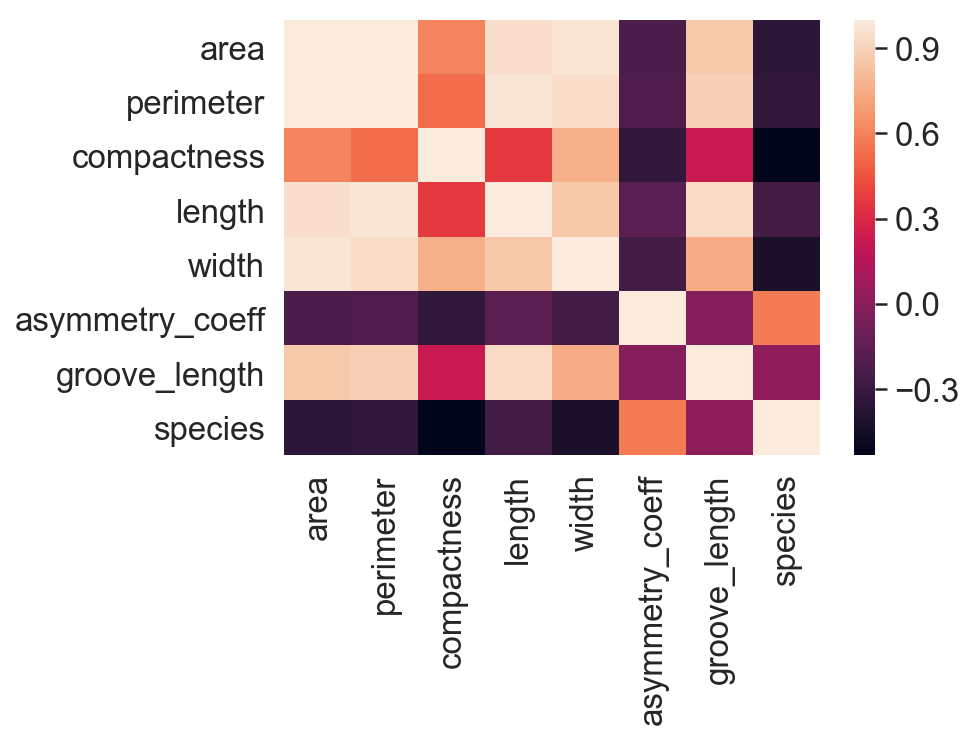

In [6]:
sns.heatmap(seeds.corr())

### Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [8]:
# drop 'species', which is currently acting as a target (categorical)
X = seeds.copy()
y = X.pop('species')

### Rescale the data if necessary

In [11]:
scaler = StandardScaler()
Xs = pd.DataFrame(scaler.fit_transform(X))

### Clustering with K-Means

- We know that there are 3 actual classes. 
- Use the elbow plot to judge if 3 clusters are a good fit.

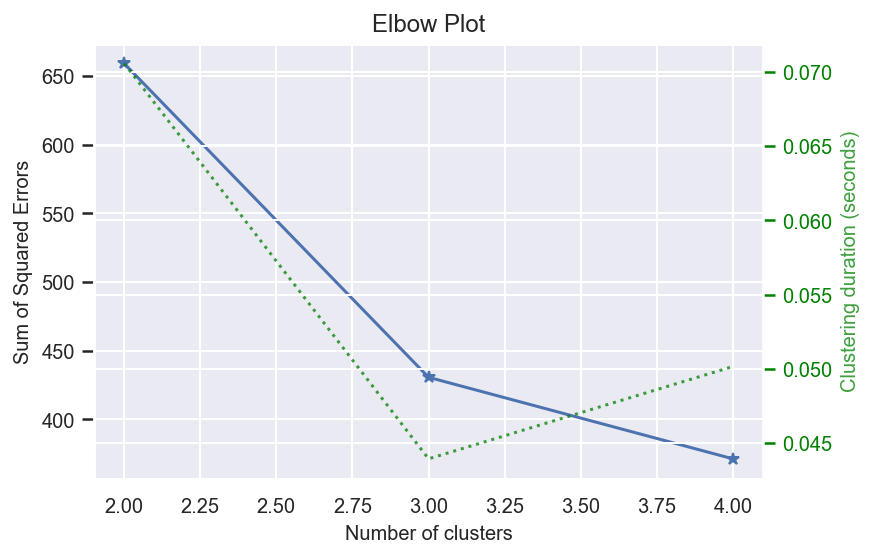

In [15]:
from sklearn.cluster import KMeans
from scikitplot.cluster import plot_elbow_curve
model = KMeans()
plot_elbow_curve(model,Xs,cluster_ranges=range(2,5))

### Get the labels and centroids for out first clustering model

In [18]:
model = KMeans(3)
model.fit(Xs)
labels = model.labels_
centroids = model.cluster_centers_

### Compute the silhouette score and visually examine the results of the clusters

_(pairplot with hue)_

/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


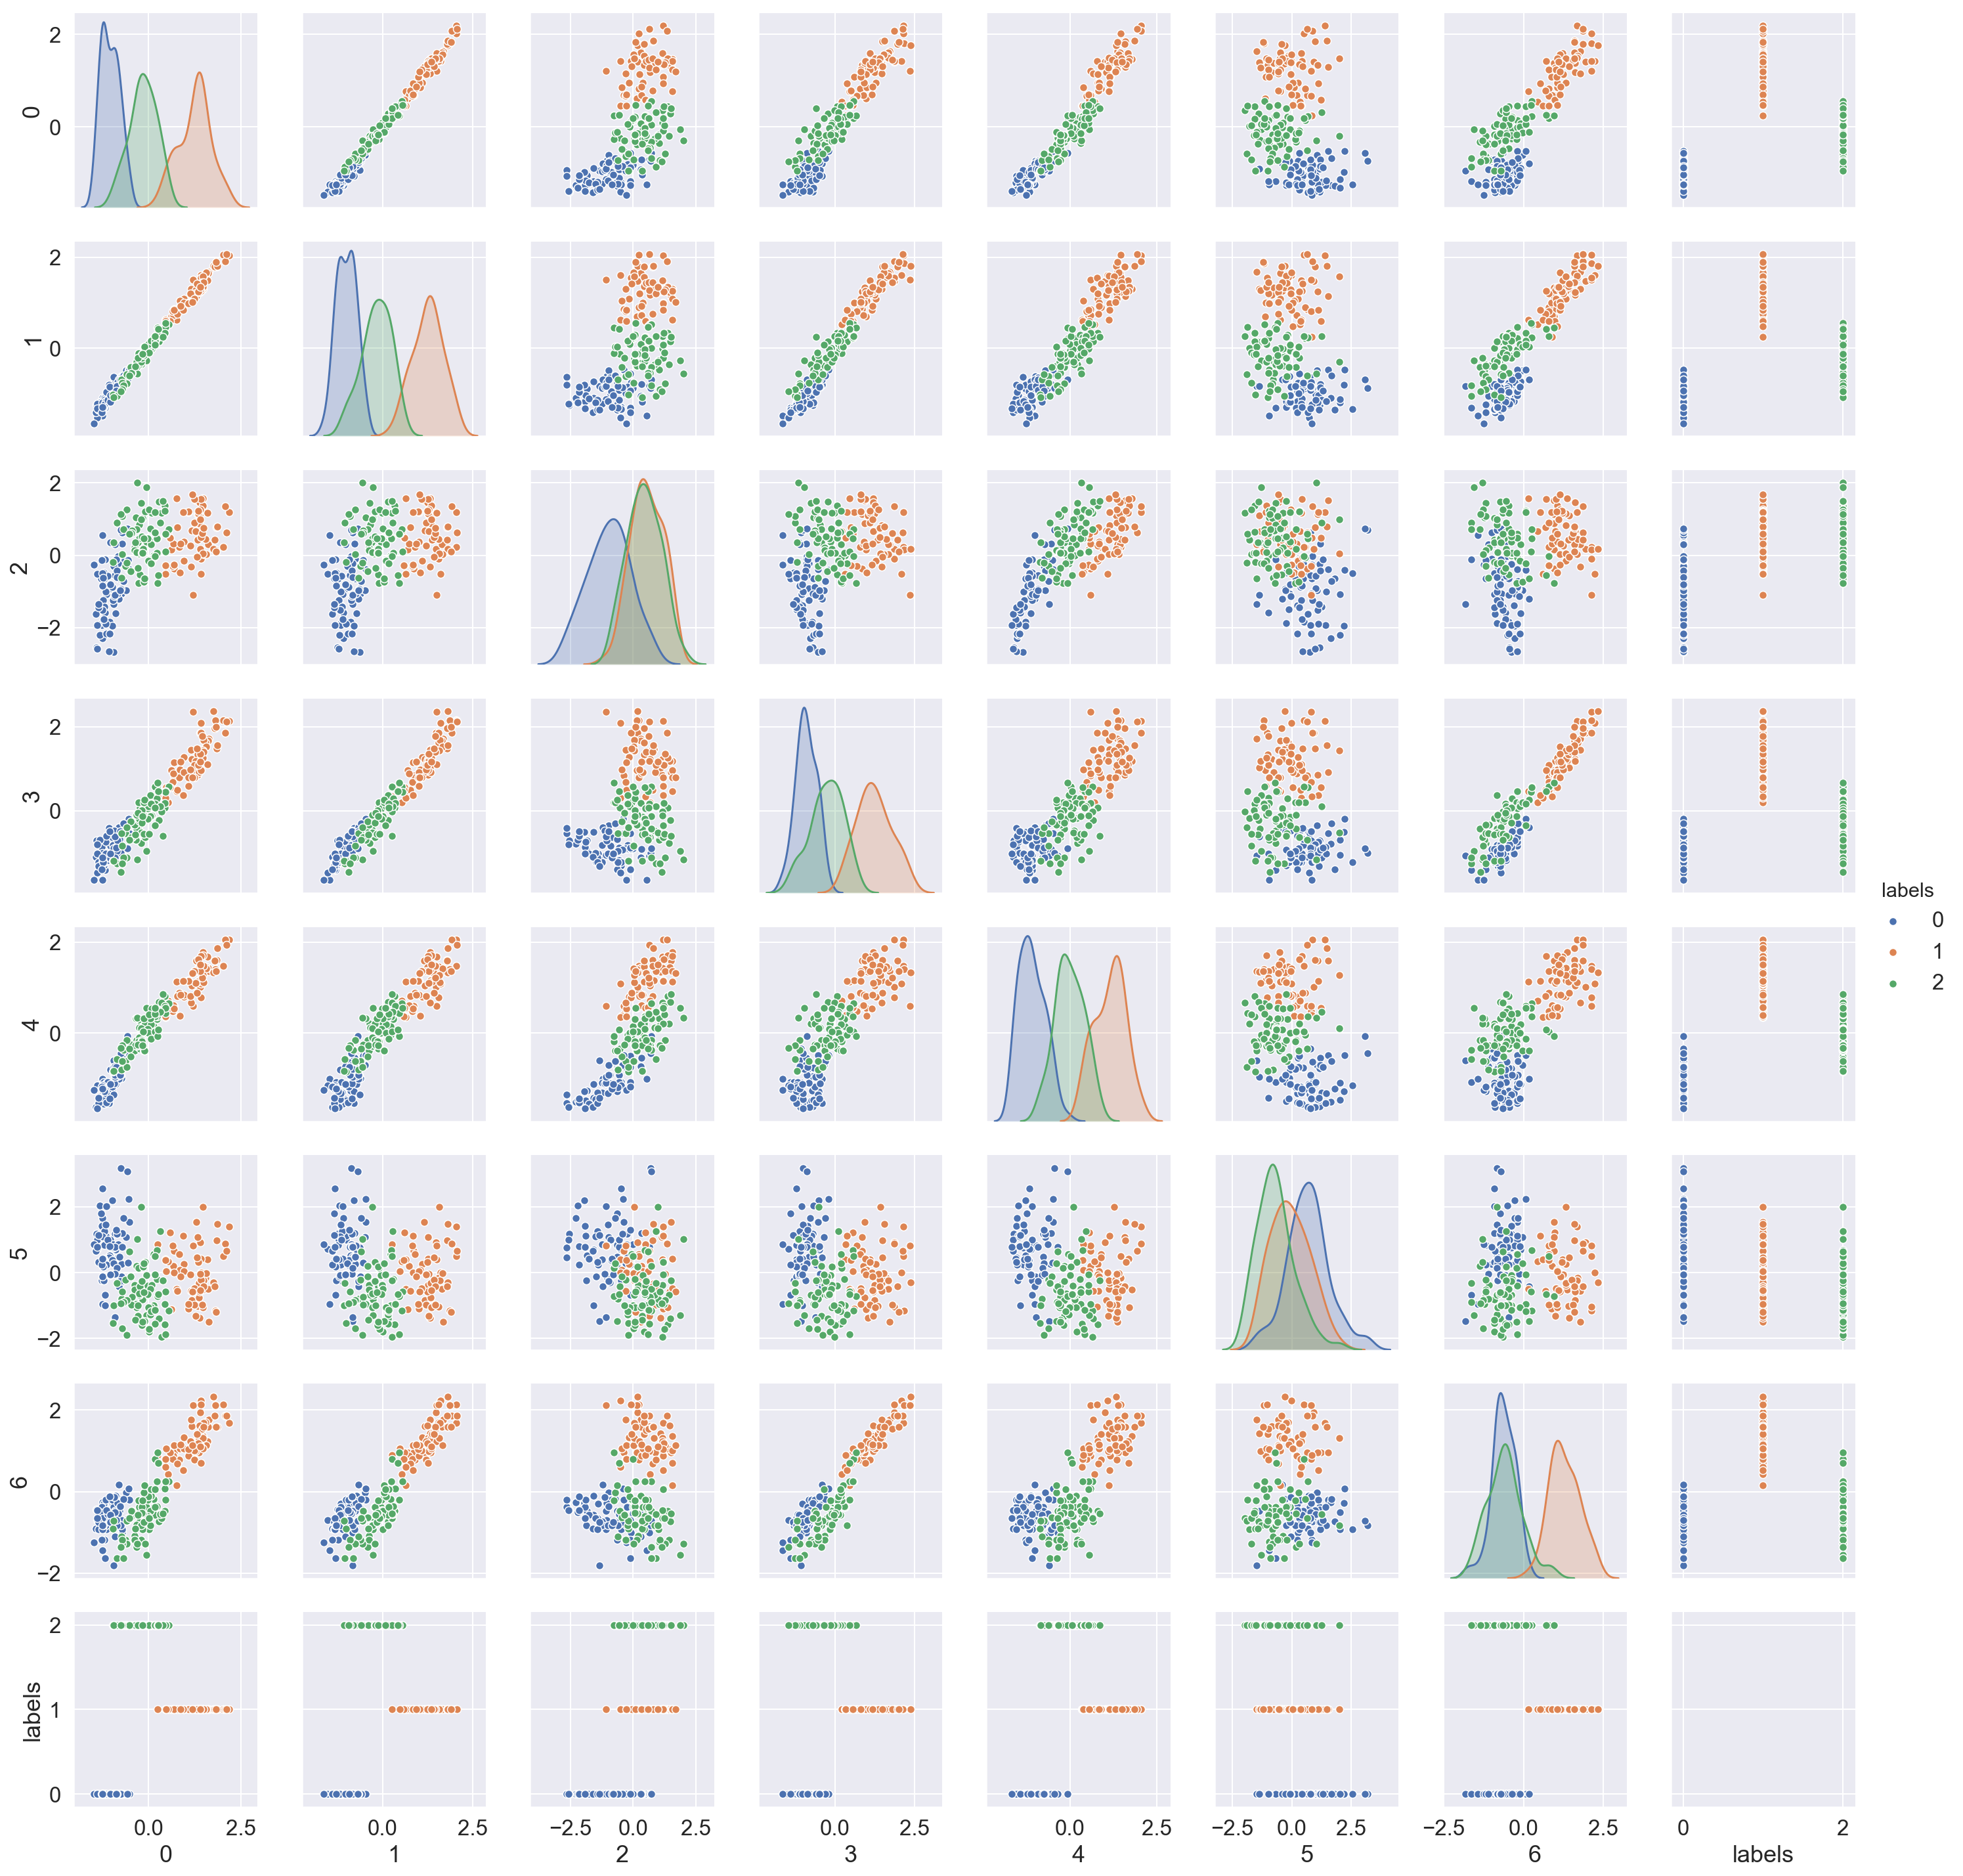

In [19]:
Xs['labels'] = labels
sns.pairplot(data=Xs,hue='labels')

### Repeat the last steps with two selected K values and compare the results

/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


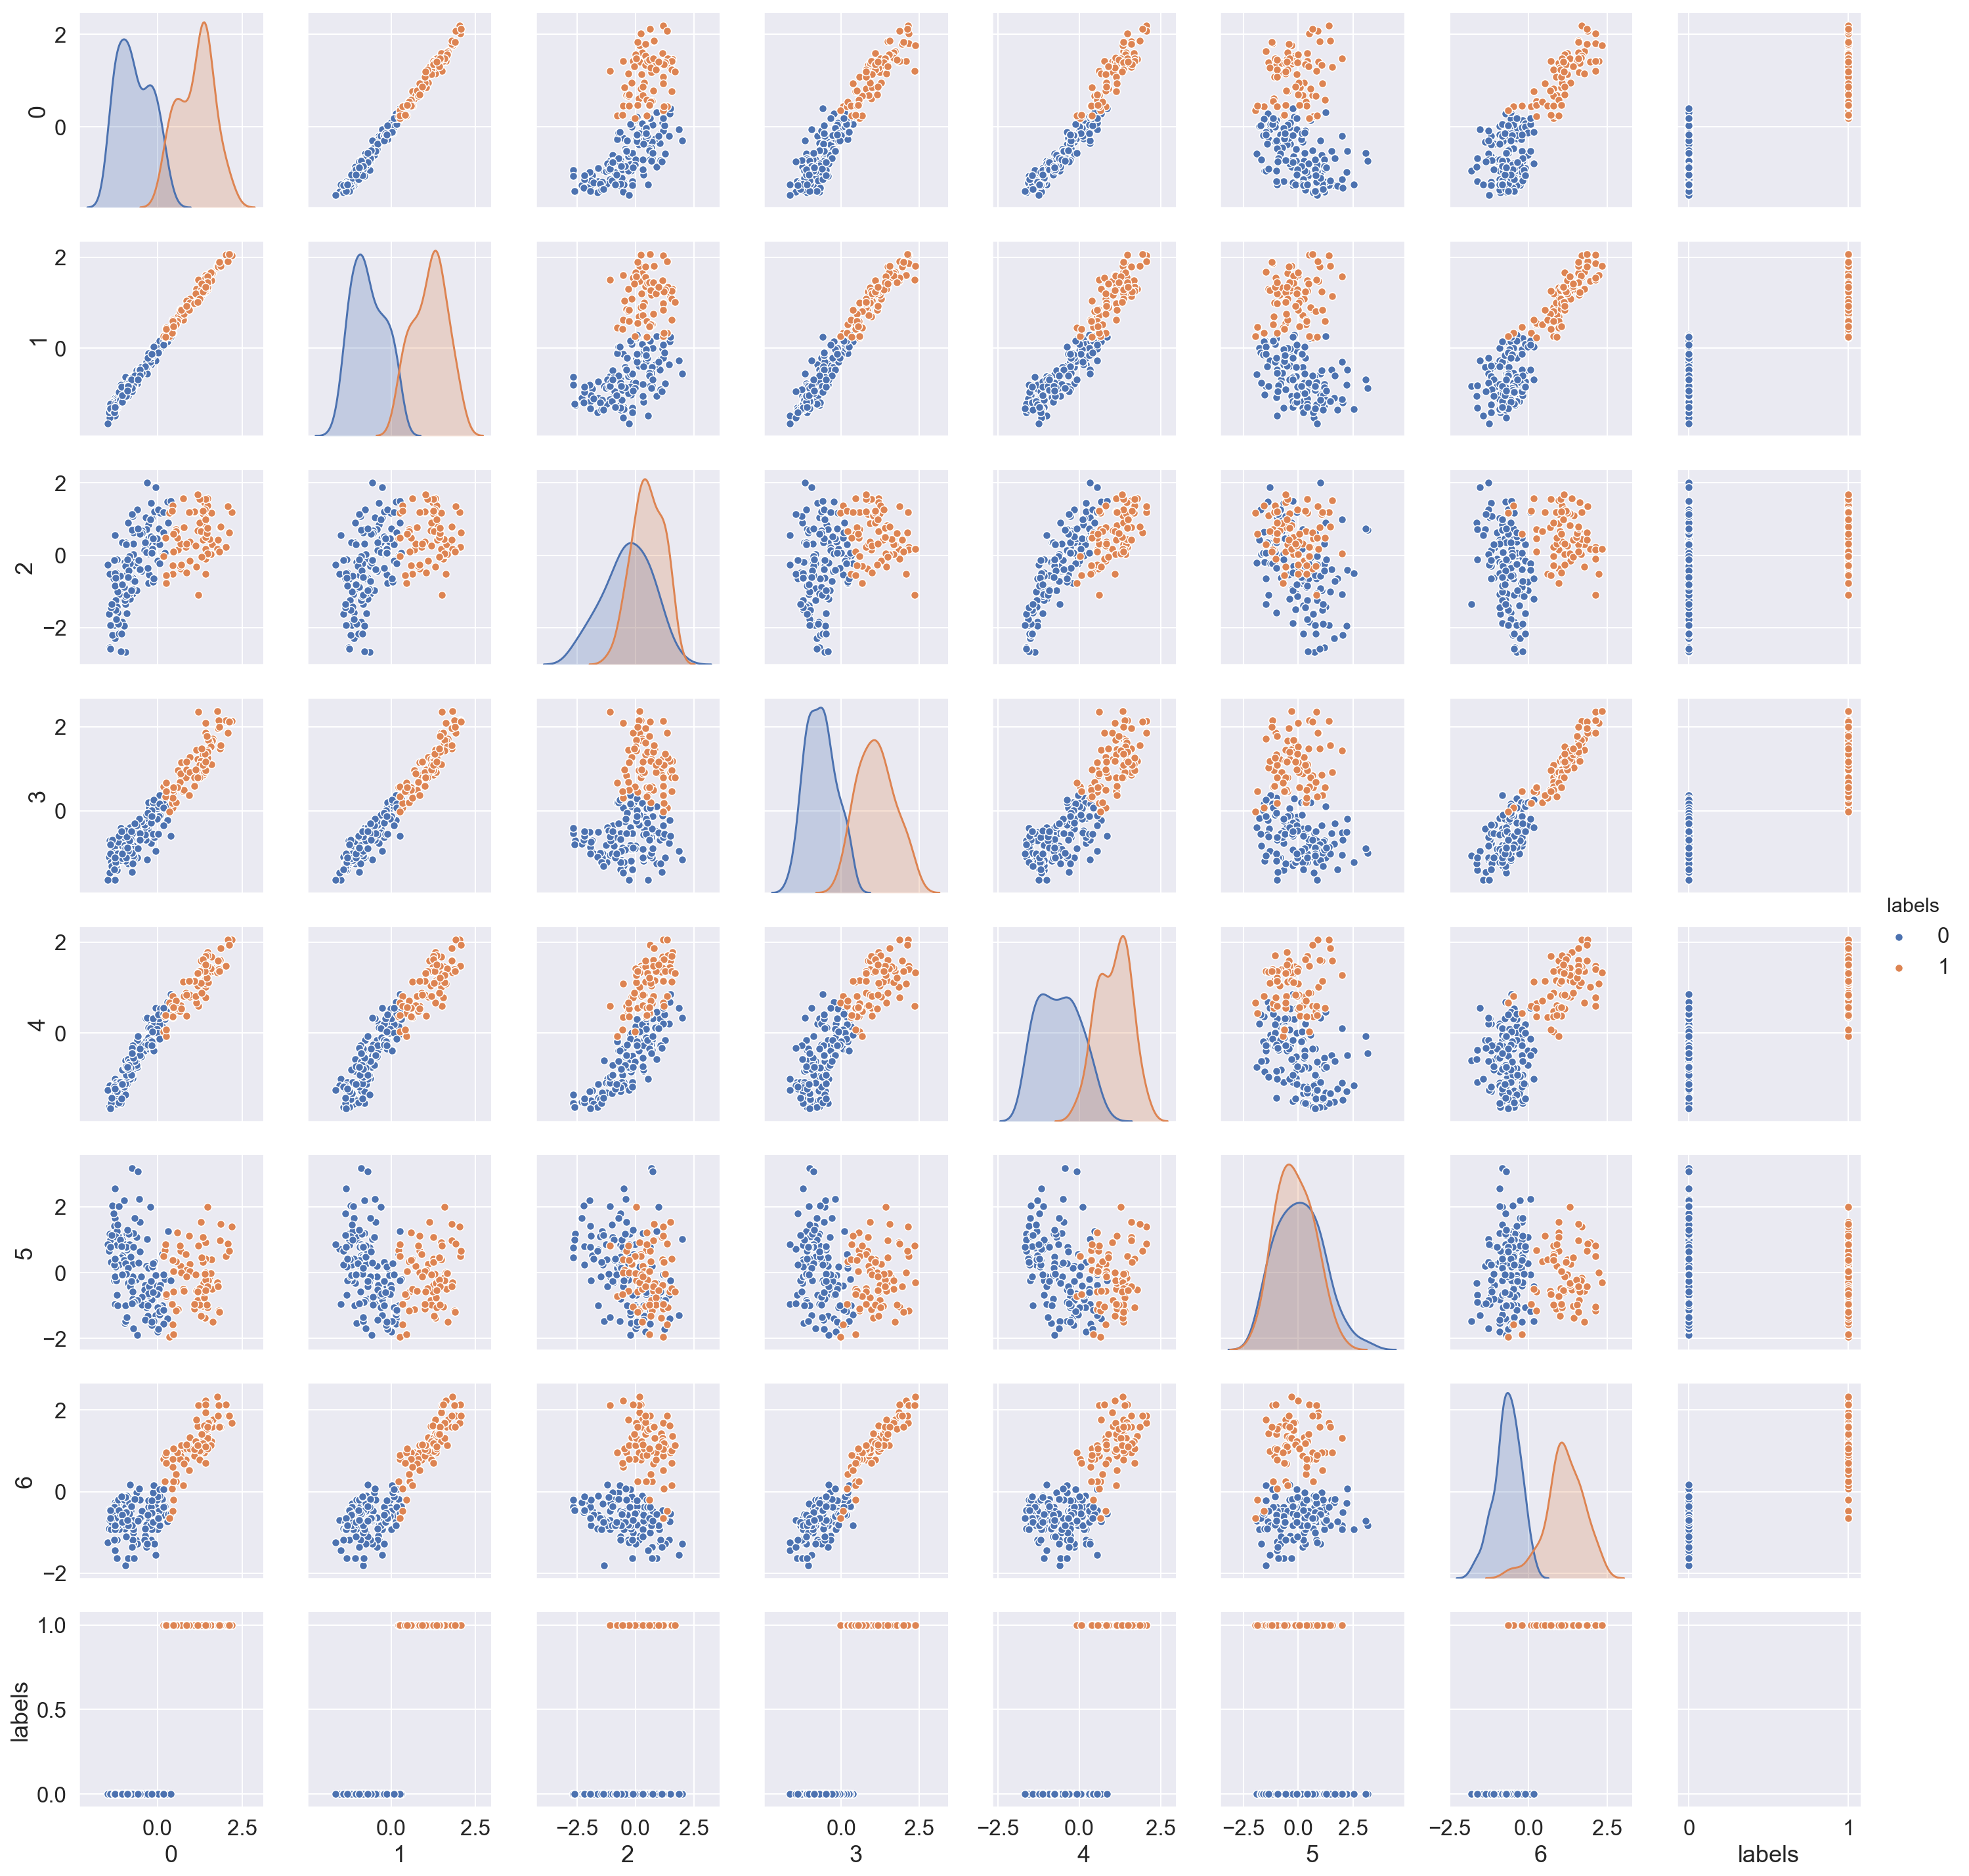

In [20]:
# k = 2

y = Xs.pop('labels')
model = KMeans(2)
model.fit(Xs)
labels = model.labels_
centroids = model.cluster_centers_

Xs['labels'] = labels
sns.pairplot(data=Xs,hue='labels')

/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Noah/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


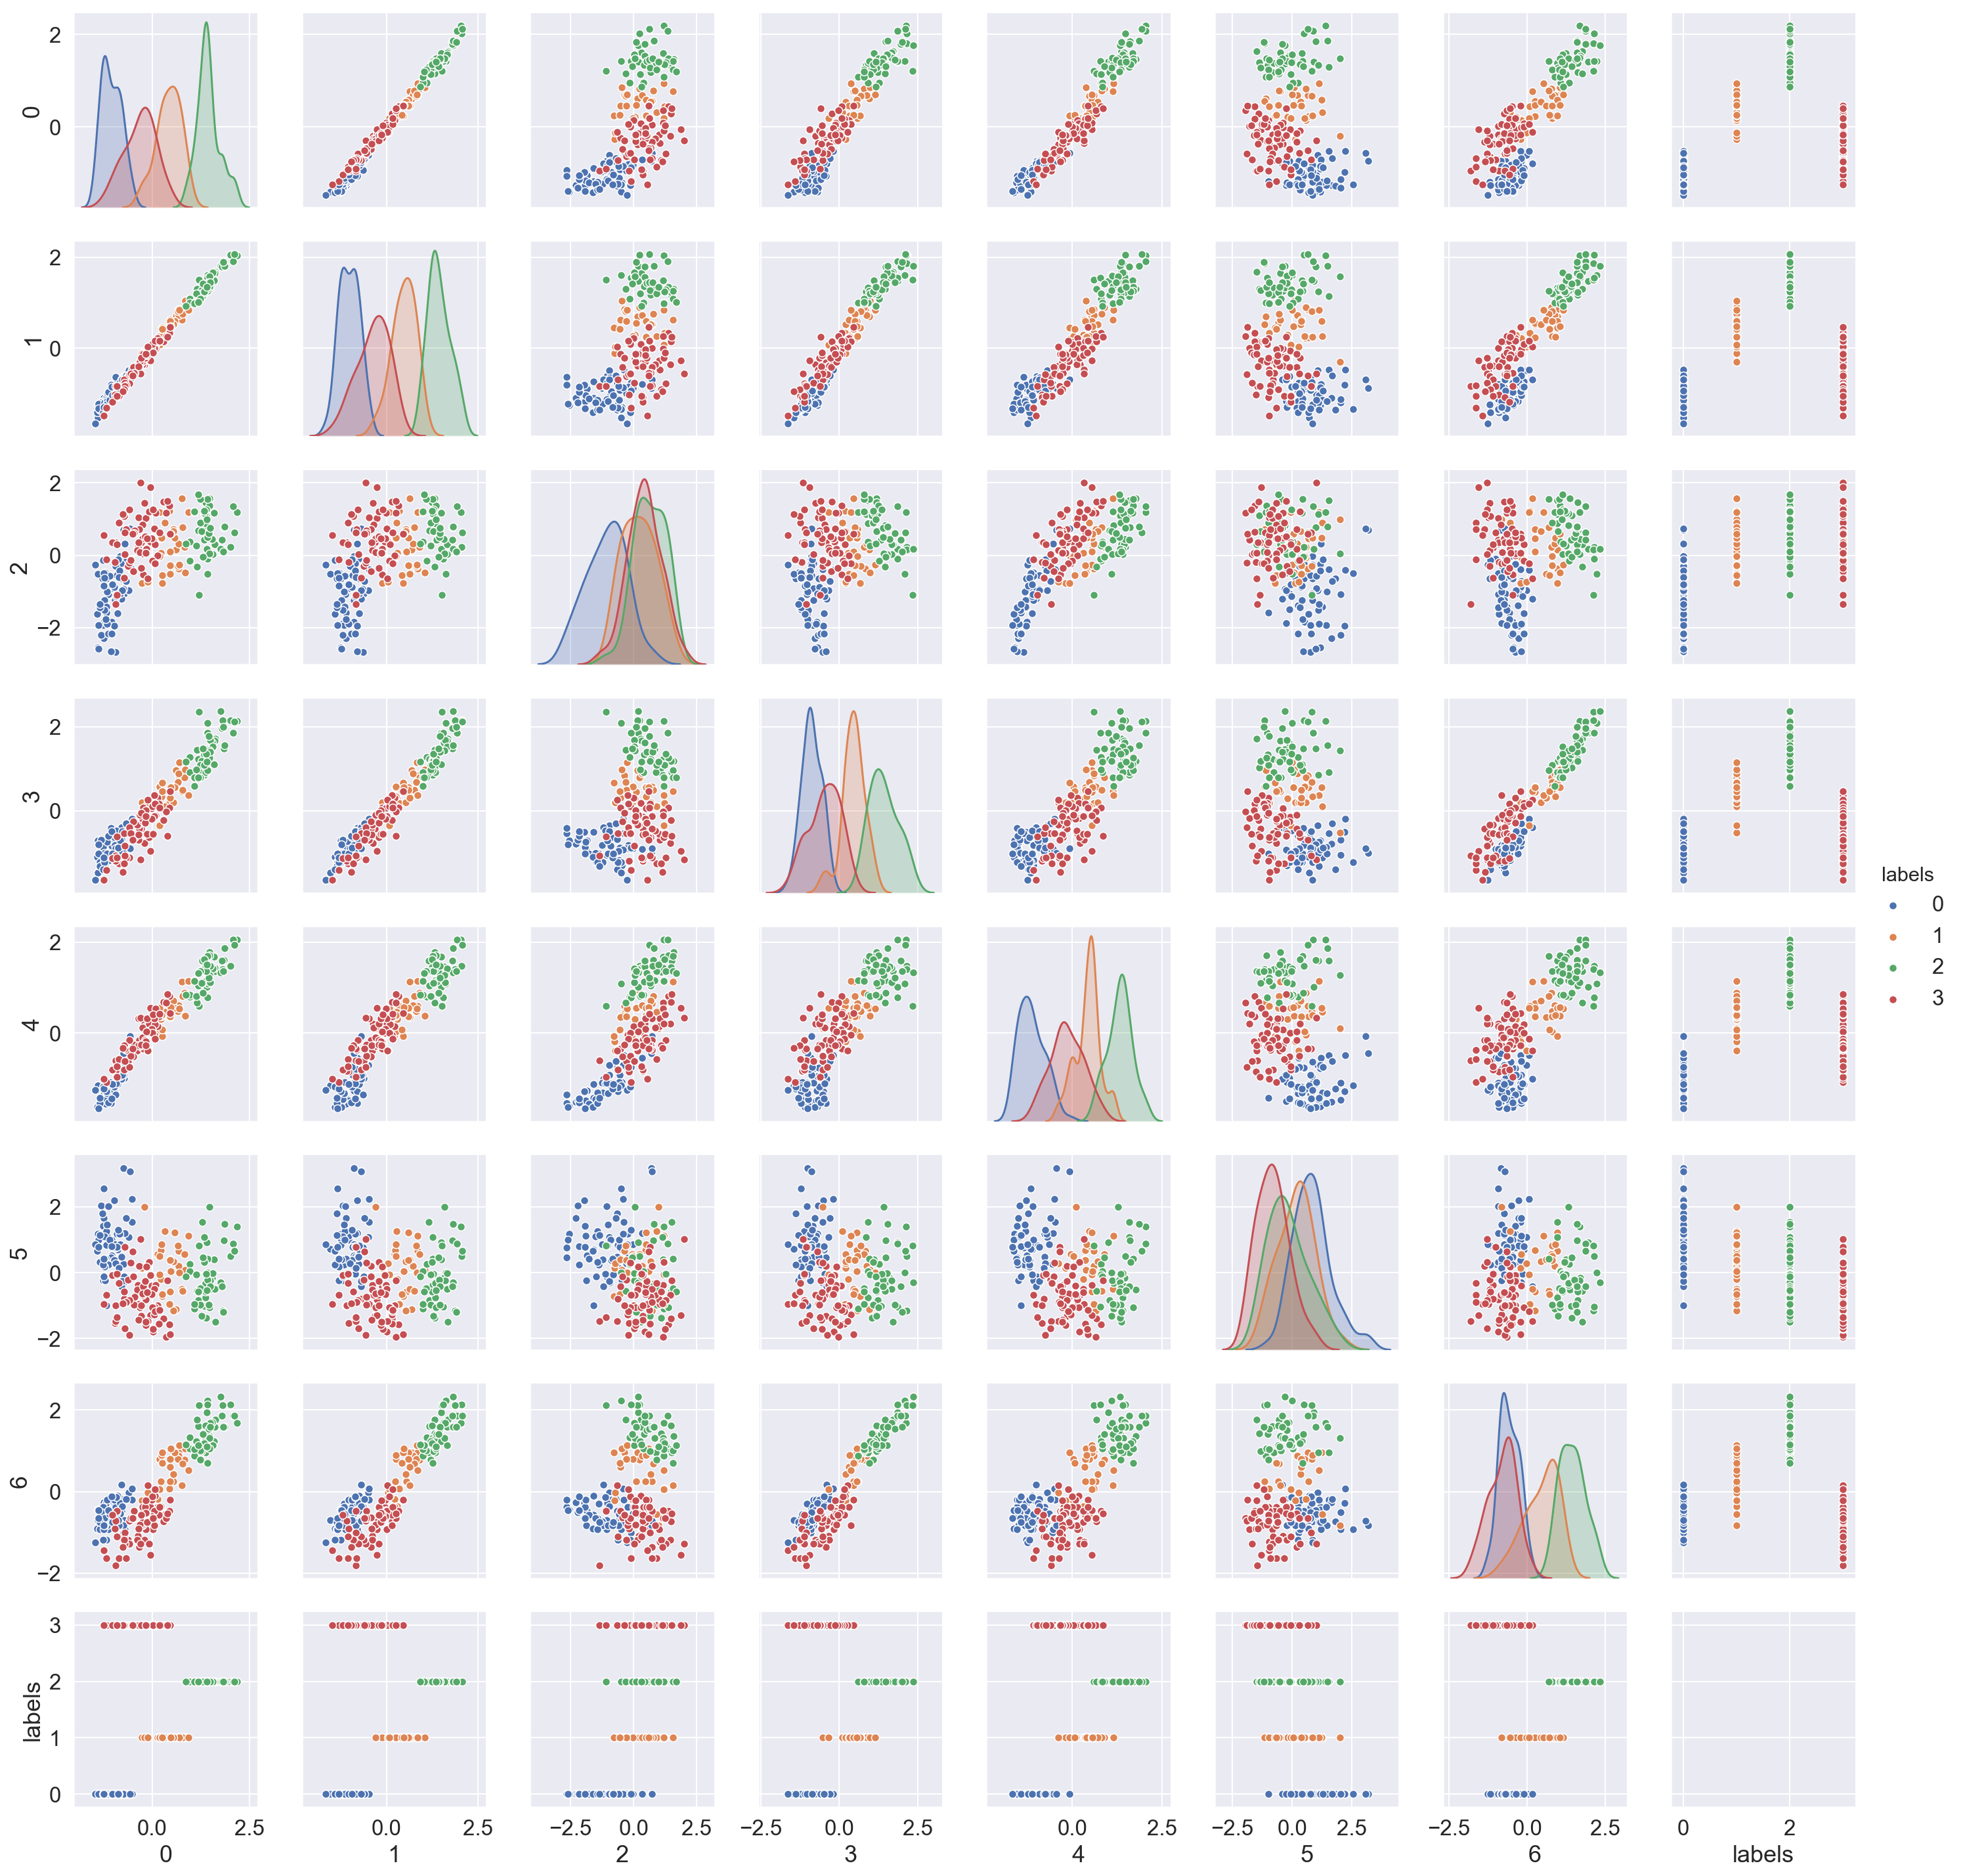

In [21]:
# k = 4

y = Xs.pop('labels')
model = KMeans(4)
model.fit(Xs)
labels = model.labels_
centroids = model.cluster_centers_

Xs['labels'] = labels
sns.pairplot(data=Xs,hue='labels')

### Build a function to find the optimal number of clusters using silhouette score as the criterion.
1. The function should accept a range and a dataframe as arguments
2. It should return the k value, associated silhoutte score and scaling method.
3. Your function should also consider different scaling options like `StandardScaler`, `MinMaxScaler`.

In [29]:
from scikitplot.metrics import plot_silhouette
from sklearn.metrics import silhouette_score

def optimal_clusters(cluster_range, df):
        
    scaler = StandardScaler()
    Xstd = scaler.fit_transform(df)
    scaler = MinMaxScaler()
    Xsca = scaler.fit_transform(df)
    
    for i in cluster_range:
        print('Clusters:', i)
        model = KMeans(i)
        model.fit(Xstd)
        print('Std-scaled Silhouette Score', silhouette_score(Xstd, model.labels_))        
        model.fit(Xsca)
        print('MinMax-scaled Silhouette Score', silhouette_score(Xsca, model.labels_))

In [30]:
optimal_clusters(range(2,6),X)

Clusters: 2
Std-scaled Silhouette Score 0.46577247686580914
MinMax-scaled Silhouette Score 0.505113885588951
Clusters: 3
Std-scaled Silhouette Score 0.4007270552751299
MinMax-scaled Silhouette Score 0.4221052568124793
Clusters: 4
Std-scaled Silhouette Score 0.3369008229710853
MinMax-scaled Silhouette Score 0.3382407688607182
Clusters: 5
Std-scaled Silhouette Score 0.2868057362233324
MinMax-scaled Silhouette Score 0.2879872957354952


In [28]:
# suggest 2 clusters that are MinMaxScaled